In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from src.Calculators.ray_cesare import ray_maker
from src.Luminosity.special_radii import get_thermr, get_photosphere, calc_photosphere
fix = 844
m = 6
Rt = (10**m)**(1/3)

In [2]:
rays_T, rays_den, _, radii = ray_maker(fix, m, 1200)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [37]:
rays_kappa, _, _ = get_photosphere(rays_T, rays_den, radii)

In [38]:
print(len(rays_kappa[8]))

1198


In [39]:
# plot_kappa = np.zeros((len(rays_kappa),len(radii)))
# for i in range(len(rays_kappa)):
#     for j in range(len(rays_kappa[i])):
#         temp = rays_kappa[i][j]
#         plot_kappa[i][-j-1] = temp
#         if temp > 5:
#             plot_kappa[i][0:-j] = temp
#             break
#     plot_kappa[i,0:-j] = temp

In [40]:
for i in range(len(rays_kappa)):
    for j in range(0,len(rays_kappa[i])):
        step = radii[j]-radii[j-1]
        rays_kappa[i][j] /= step

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_18273/3379888005.py:5: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_18273/3379888005.py:5: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]


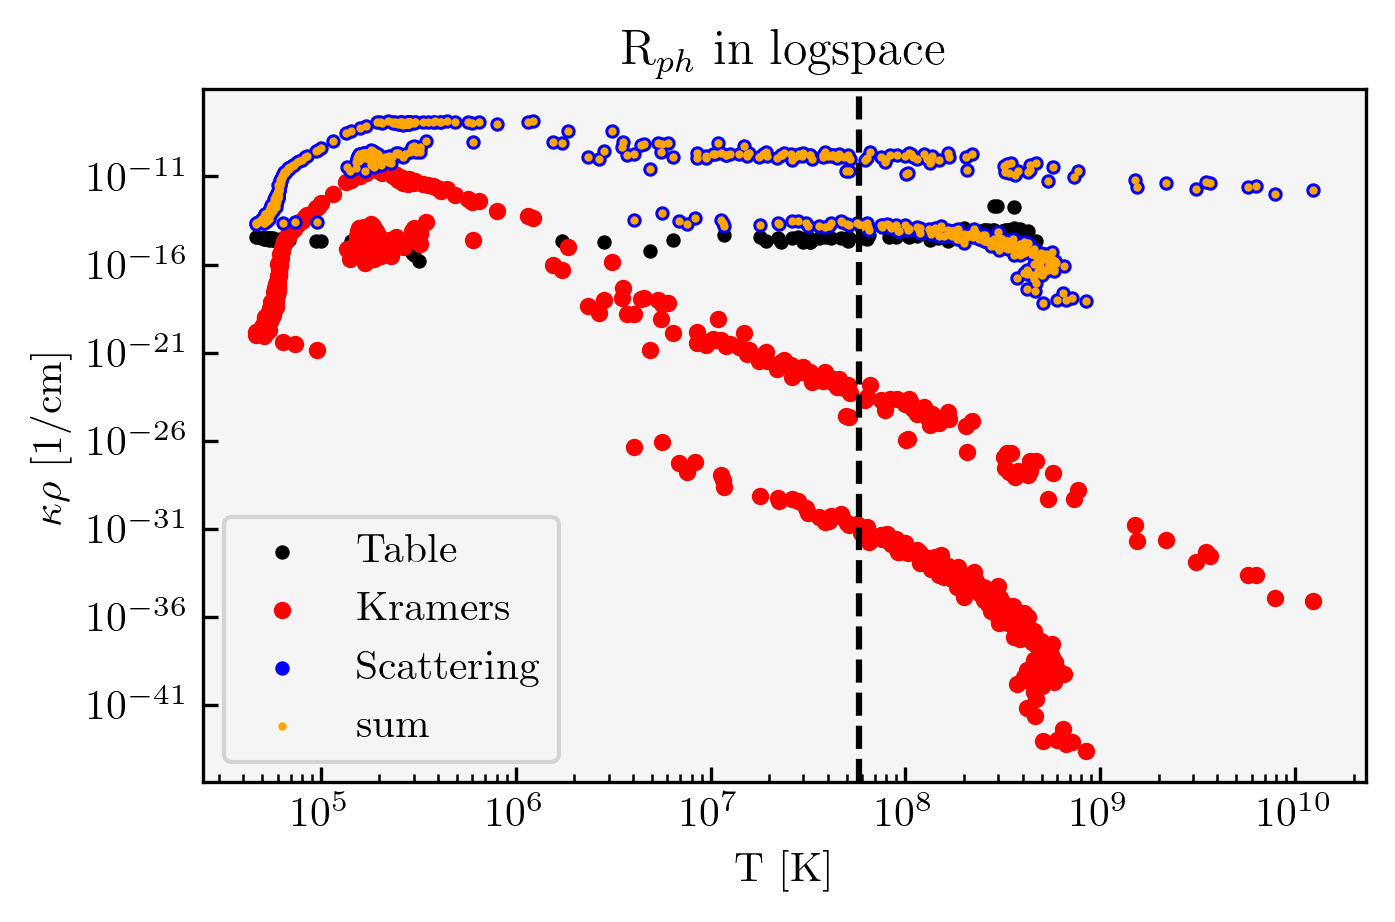

In [46]:
index = 91
data_den = rays_den[index]
data_T =rays_T[index]
kappa = rays_kappa[index]
kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
scattering = (1+0.7389) * 0.2 * data_den 
sum =  (kram + scattering) 
plt.scatter(data_T[0:len(kappa)],kappa, s = 6, c = 'k', label = 'Table')
plt.scatter(data_T, kram, s = 10, c = 'r', label = 'Kramers')
plt.scatter(data_T, scattering, s = 6, c = 'b', label = 'Scattering')
plt.scatter(data_T,sum, s = 1, c = 'orange', label = 'sum')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{ph}$ in logspace')
plt.savefig('Final plot/photosphere_comparison_log.png')
plt.show()

In [19]:
print(y[2])

3337.5


In [23]:
print(2850/0.4)

7125.0


0.0


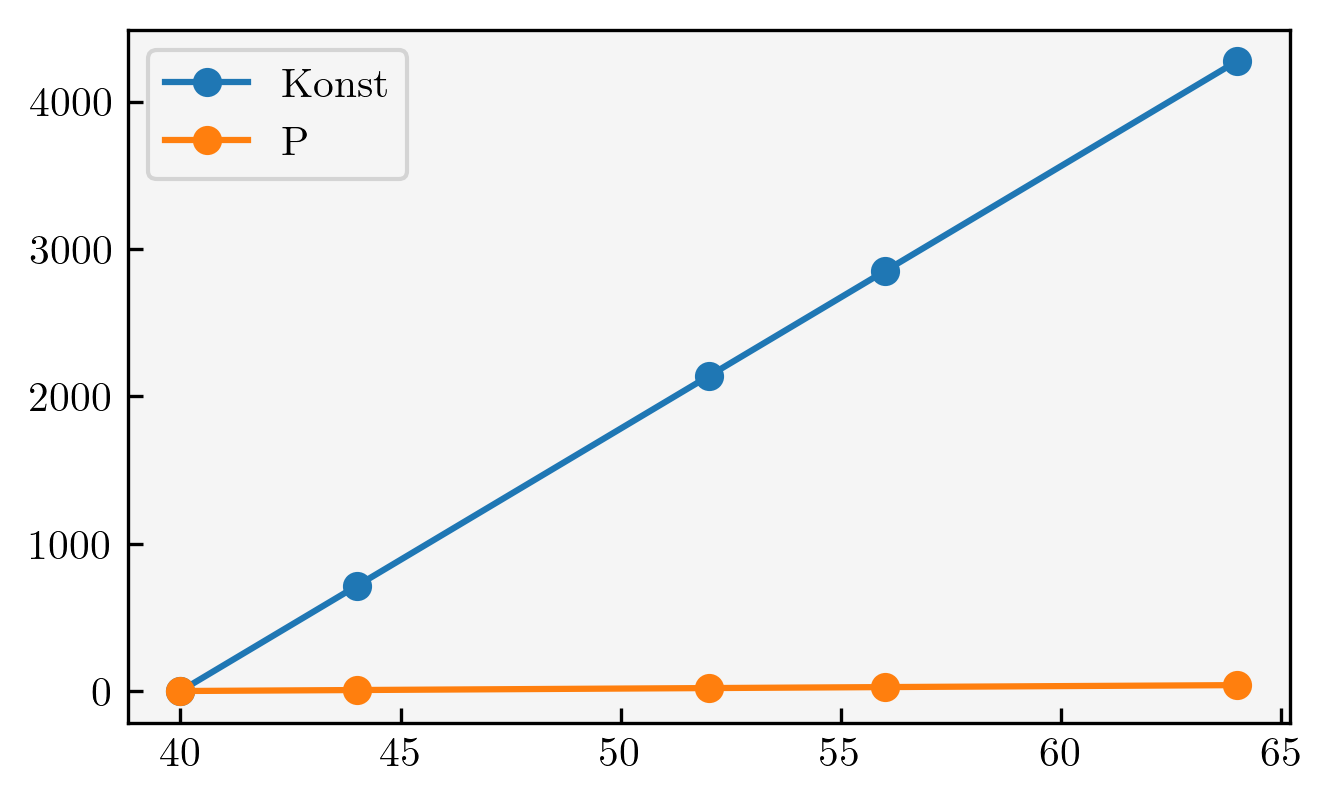

In [4]:
tf = np.array([1,1.1,1.3,1.4,1.6])
days = tf * 40
nums = np.array([1200, 1800, 2700, 4050])
num_scale = nums - 1200
y1 = 2850*(tf-1)/0.4 
y = (days-40)*(5/3)
#plt.plot(days, num_scale, '-o', label = 'mine')
plt.plot(days, y1, '-o', label = 'Konst')
plt.plot(days, y, '-o', label = 'P')
plt.legend()
print(y[0])

In [5]:
y1[-1]

4275.0

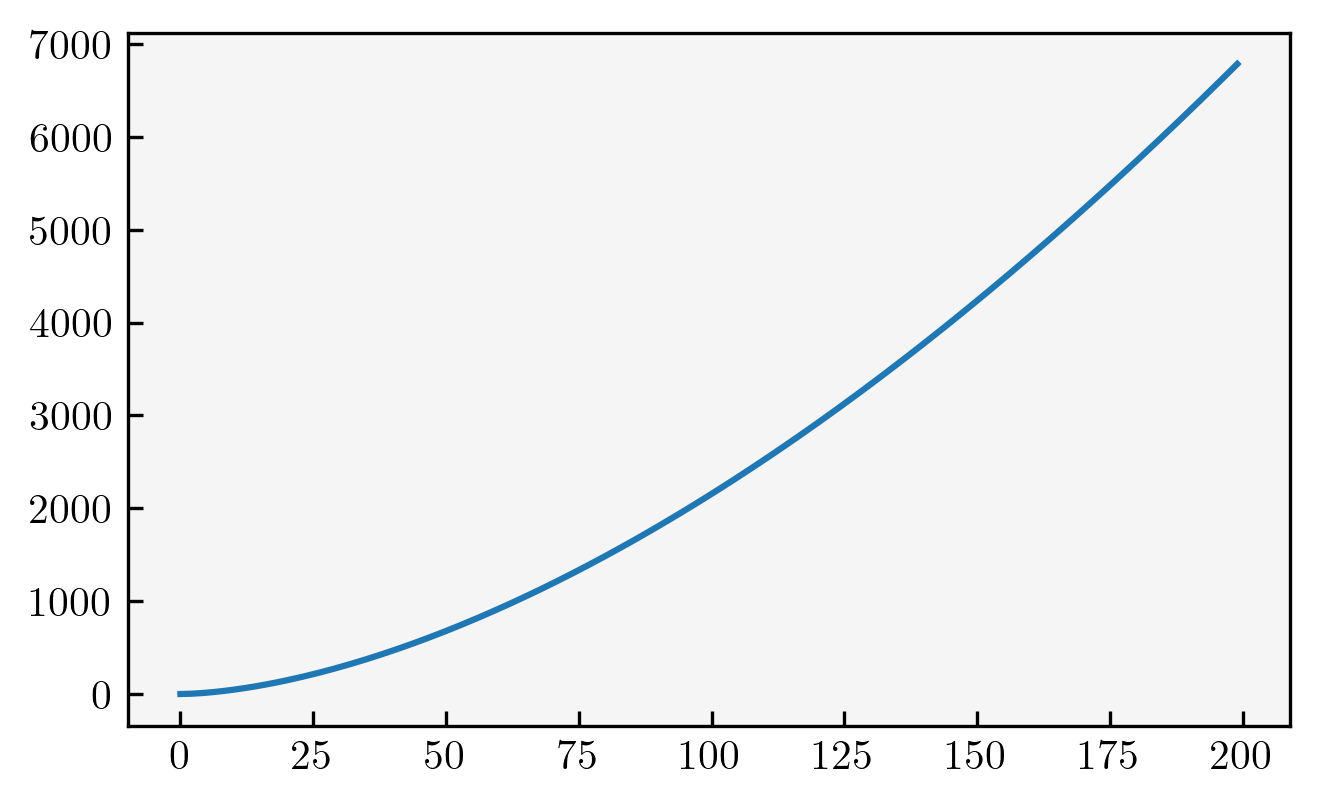

In [10]:
x = np.arange(200)
z = x**(5/3)
plt.plot(x, z)